<h1>How to derive basic insights from data?</h1>
<br>
We often work with an Excel-like data file, for which Pandas is an appropriate data library. Pandas plotting is built on top of Matplotlib but is a higher-level plotting API (with shorter and more convenient code). 


<p class="lead"> 
Table of Contents: 

- <a href="#Understanding-Pandas-and-loading-data">Understanding Pandas and loading data</a>
- <a href="#Pandas-plotting-API">Pandas plotting API</a>    
- <a href="#Pattern-of-a-continuous-variable">Pattern of a continuous variable</a>
- <a href="#Pattern-of-a-categorical-variable">Pattern of a categorical variable</a>
- <a href="#Relationship-between-two-variables">Relationship between two variables</a>
- <a href="#Time-series">Time series</a>
    
</p>





<div>
<h2 class="breadcrumb">Understanding Pandas and loading data</h2><p>
</div>

> Pandas DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. (pandas.pydata.org)

In [23]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/mpg.csv')

In [3]:
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [4]:
len(df)

234

In [5]:
df.describe()

displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000
max      7.000000  2008.000000    8.000000   35.000000   44.000000

The column labels can be accessed using columns attributes:

In [6]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

Use df.column_name or df['column_name'] to get a column:

In [11]:
df.cty

0      18
1      21
2      20
3      21
4      16
       ..
229    19
230    21
231    16
232    18
233    17
Name: cty, Length: 234, dtype: int64

In [12]:
df['cty']

0      18
1      21
2      20
3      21
4      16
       ..
229    19
230    21
231    16
232    18
233    17
Name: cty, Length: 234, dtype: int64

In [13]:
df.cty.mean()

16.858974358974358

In [14]:
df.cty.std()

4.255945678889395

In [16]:
df.manufacturer.value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

<div class="alert alert-info">
<h4>Exercise</h4>

Try load in another dataset from 'assets/penguins.csv' and call it `dfe`.  
<details><summary><i><u>(Hint)</u><i></summary><br>
Use the `pd.read_csv` method. 
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')
```
</details>
</details>
</div>

<div class="alert alert-info">
<h4>Exercise</h4>

Explore the Penguins dataset.  
</div>

<div>
<h2 class="breadcrumb">Pandas plotting API</h2><p>
</div>

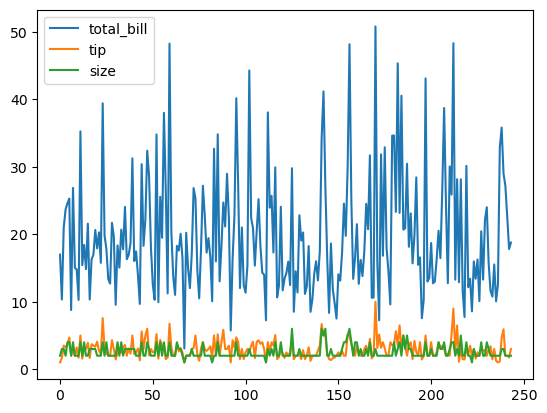

In [24]:
dfs = pd.read_csv('../datasets/tips.csv')
dfs.plot();

<div class="alert alert-success">
<h4>Tips</h4>

To understand how df.plot works, try `df.plot?`

In [ ]:
dfs.plot?

<div>
<h2 class="breadcrumb">Pattern of a continuous variable</h2><p>
</div>

In [26]:
dfs.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Histogram

> A `histogram` is a representation of the distribution of data.


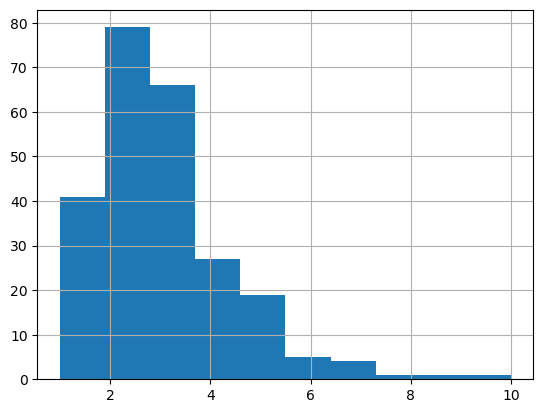

In [30]:
dfs['tip'].hist(grid=True);

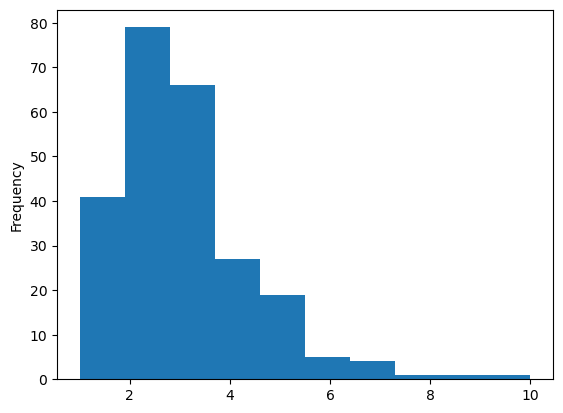

In [32]:
dfs['tip'].plot(kind='hist');

Create histogram plots for two variables:

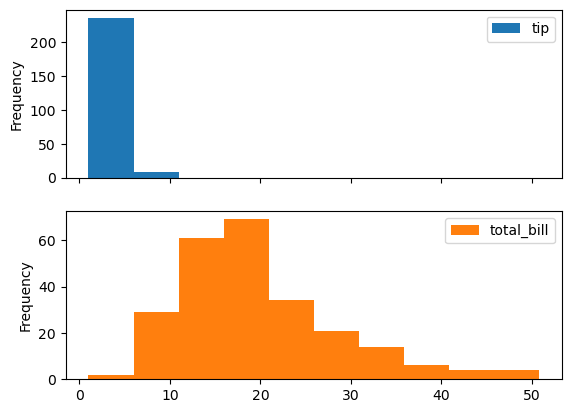

In [34]:
dfs[['tip', 'total_bill']].plot(kind='hist', subplots=True);

What is the distribution of mpg by origin?

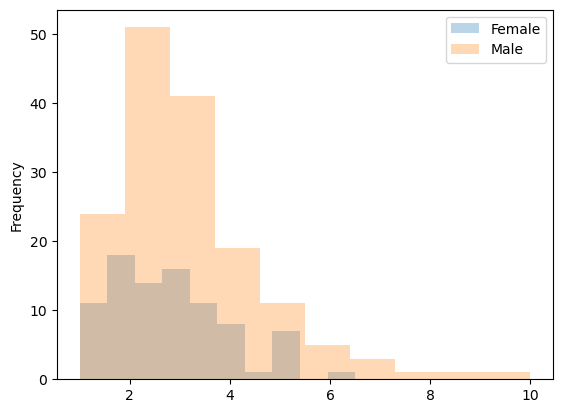

In [37]:
dfs.groupby('sex')['tip'].plot(kind='hist', alpha=0.3, legend=True);

### Kernel Density Estimate plot

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.


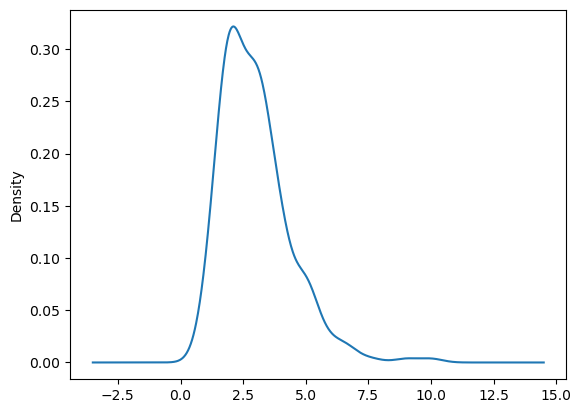

In [38]:
dfs['tip'].plot(kind='kde');

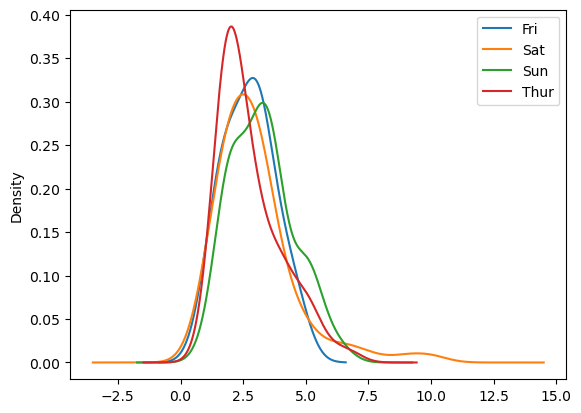

In [39]:
dfs.groupby('day')['tip'].plot(kind='kde', legend=True);

<div class="alert alert-info">
<h4>Exercise</h4>

In the previous exercise, you have loaded the Penguins dataset. In this exercise, explore the distribution of body mass of penguins and see how the distributions differ by species and sex. 
    
<details><summary><i><u>(Hint)</u><i></summary><br>
You can either use histogram or kernel density plot for this exercise, or both! 
    
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe['body_mass_g'].plot(kind='kde');
dfe.groupby('species')['body_mass_g'].plot(kind='kde', legend=True);
dfe.groupby('sex')['body_mass_g'].plot(kind='kde', legend=True);
dfe.groupby(['sex','species'])['body_mass_g'].plot(kind='kde', legend=True);

```
</details>
</details>
</div>

<div>
<h2 class="breadcrumb">Pattern of a categorical variable</h2><p>
</div>

### Bar chart

In [40]:
dfs.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [41]:
dfs['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

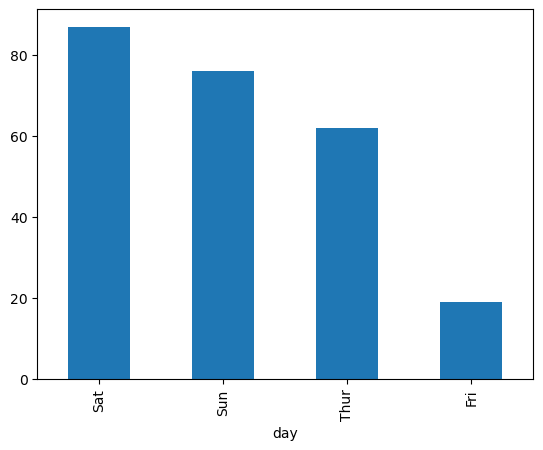

In [42]:
dfs['day'].value_counts().plot(kind='bar');

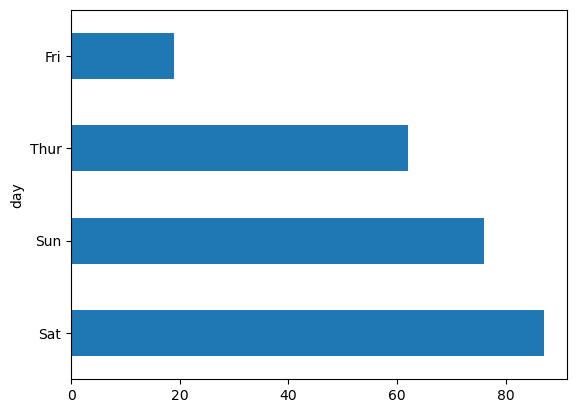

In [43]:
dfs['day'].value_counts().plot(kind='barh');

#### User bar chart to show mpg info by origin and model year

In [2]:
# table = dfs.groupby(['size', 'day']).mean()['tip'].unstack('day')

In [1]:
# table.plot(kind='bar', stacked=True);

### Pie chart

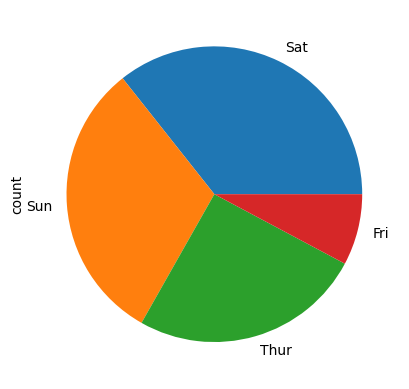

In [51]:
dfs['day'].value_counts().plot(kind='pie');

<div class="alert alert-info">
<h4>Exercise</h4>

Create two plots with the Penguins dataset:
1) Bar plot showing the counts of species. 
    
2) Bar plot showing the mean values of body mass by species and by sex. 
    
    
<details><summary><i><u>(Solution)</u><i></summary><br>
<details><summary><i><u>(You can do it!)</u><i></summary><br>
    
```python
dfe['species'].value_counts().plot(kind='bar');
dfe.groupby(['species', 'sex']).mean().unstack('sex')['body_mass_g'].plot(kind='bar');
```
</details>
</details>
</div>

In [4]:
# exercise 
import pandas as pd
FILE_PATH = '../datasets/penguins.csv'
penguins = pd.read_csv(FILE_PATH)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

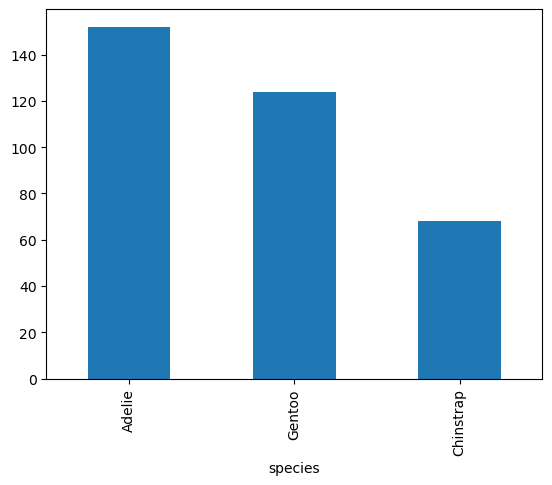

In [6]:
# showing the count of species
penguins['species'].value_counts().plot(kind='bar');

In [21]:
# penguins.groupby(['species', 'sex']).mean()['body_mass_g']
# penguins.groupby(['species', 'sex']).mean().unstack('sex')['body_mass_g'].plot(kind='bar');

<div>
<h2 class="breadcrumb">Relationship between two variables</h2><p>
</div>

Relationship between weight and mpg:

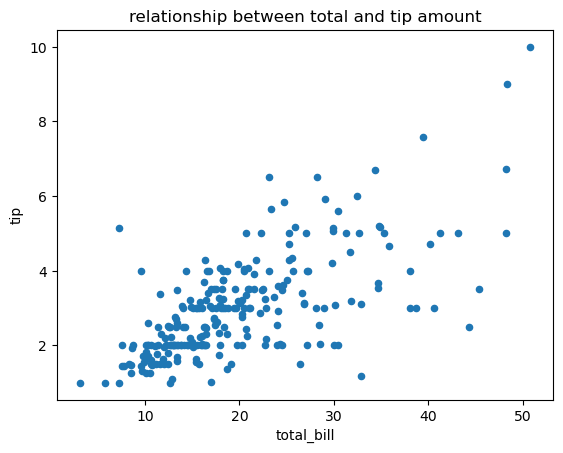

In [30]:
dfs.plot(x='total_bill', y='tip', kind='scatter', title='relationship between total and tip amount');

Relationship between weight and mpg by origin:

There are often many ways to create the same plot. Here is one way to create this plot. We will see another way in the next notebook. 

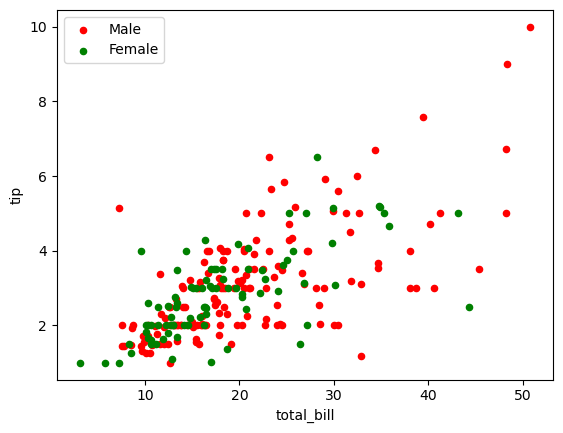

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dfs[dfs.sex=='Male'].plot(x='total_bill', y='tip', kind='scatter', ax=ax, c='r', label='Male');
dfs[dfs.sex=='Female'].plot(x='total_bill', y='tip', kind='scatter', ax=ax, c='g', label='Female');


<div class="alert alert-info">
<h4>Exercise</h4>

Create two plots with the Penguins dataset:
1) Scatter plot showing the relationship between flipper length and body mass. 
    
2) Showing this relationship by species.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
    
<details><summary><i><u>(Give yourself one more minute)</u><i></summary><br>
    
```python
dfe.plot(x='flipper_length_mm', y='body_mass_g', kind='scatter');

fig, ax = plt.subplots()
dfe[dfe.species=='Adelie'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='r', label='Adelie');
dfe[dfe.species=='Gentoo'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='g', label='Gentoo');
dfe[dfe.species=='Chinstrap'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='b', label='Chinstrap');

```
</details>
</details>
</div>

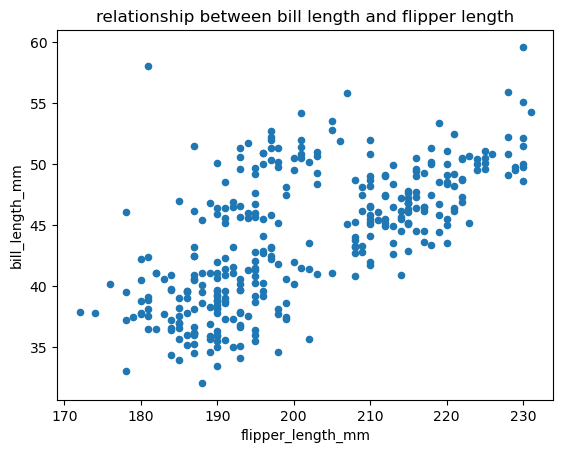

In [32]:
# exercises
penguins.plot(x='flipper_length_mm', y='bill_length_mm', kind='scatter', title='relationship between bill length and flipper length');

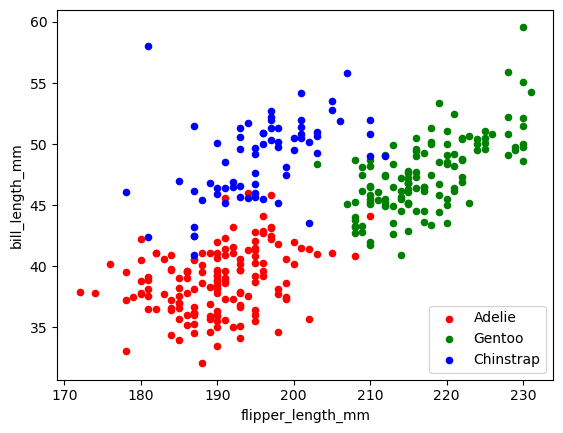

In [35]:
# by species
fig, ax = plt.subplots()
penguins[penguins.species=='Adelie'].plot(x='flipper_length_mm', y='bill_length_mm', kind='scatter', ax=ax, c='r', label='Adelie');
penguins[penguins.species=='Gentoo'].plot(x='flipper_length_mm', y='bill_length_mm', kind='scatter', ax=ax, c='g', label='Gentoo');
penguins[penguins.species=='Chinstrap'].plot(x='flipper_length_mm', y='bill_length_mm', kind='scatter', ax=ax, c='b', label='Chinstrap');

<div>
<h2 class="breadcrumb">Time series</h2><p>
</div>

In [36]:
dft = pd.read_csv(
    '../datasets/air_quality_no2.csv', 
    index_col=0, 
    parse_dates=True
)

In [37]:
dft.head()

station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN

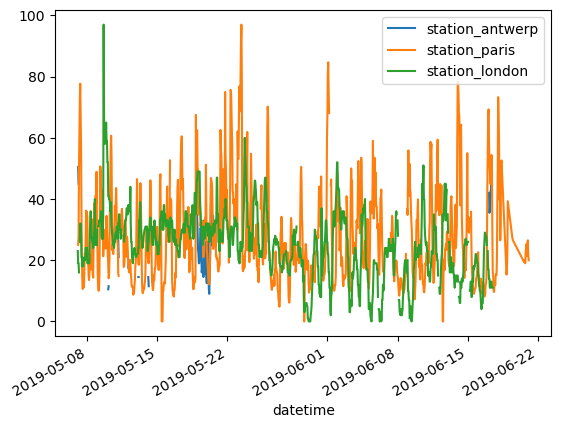

In [38]:
dft.plot();

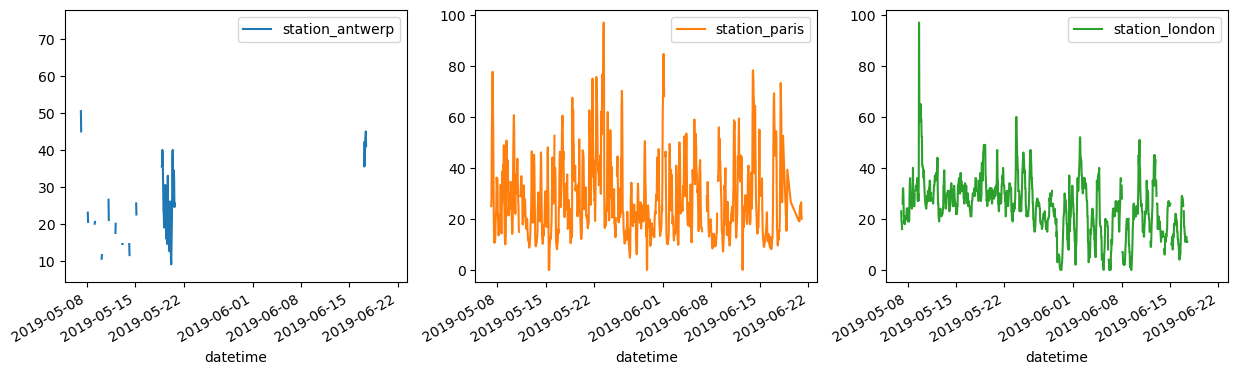

In [39]:
dft.plot(subplots=True, layout=(1,3), figsize=(15,4));

<div class="alert alert-info">
<h4>Exercise</h4>

Create an area chart for this time series data.
<details><summary><i><u>(Hint)</u><i></summary><br>
Try `kind="area"`
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dft.plot(figsize=(12, 4), kind='area');
dft.plot(figsize=(12, 4), kind='area', subplots=True);
```
</details>
</details>
</div>

<Axes: xlabel='datetime'>

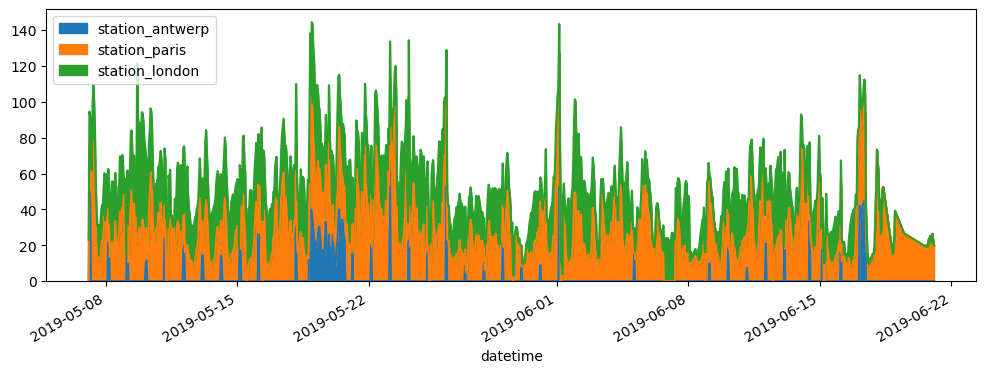

In [45]:
dft.plot(figsize=(12,4), kind='area')

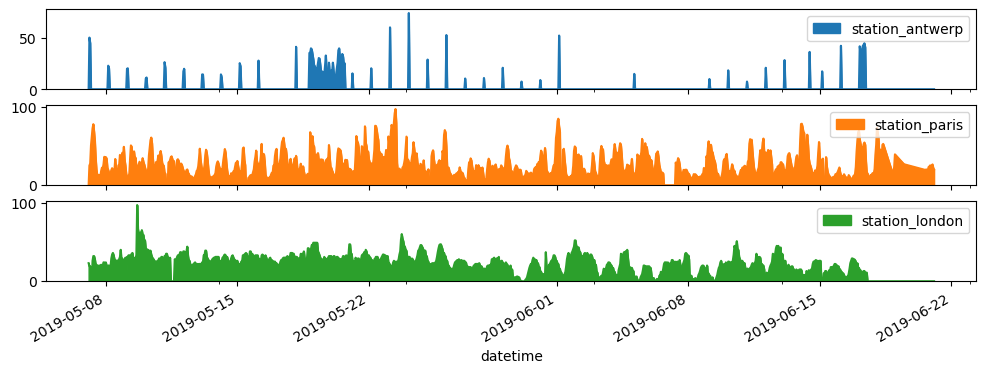

In [47]:
dft.plot(kind='area', subplots=True, figsize=(12,4));